In [12]:
#Q1
P_pass = 0.9
P_fail = 1 - P_pass
P_quick_given_pass = 0.6
P_quick_given_fail = 0.3

P_quick = P_quick_given_pass * P_pass + P_quick_given_fail * P_fail

P_pass_given_quick = (P_quick_given_pass * P_pass) / P_quick

print(f"P(Pass | Quick) = {P_pass_given_quick:.4f}")


P(Pass | Quick) = 0.9474


In [11]:
#Q2
import numpy as np
alpha_prior = np.array([1, 1, 1])
x_observed = np.array([5, 3, 2])  

alpha_posterior = alpha_prior + x_observed

print(f"Prior Parameters (alpha): {alpha_prior}")
print(f"Observed Data (x): {x_observed}")
print(f"Posterior Parameters (alpha'): {alpha_posterior}")

samples = np.random.dirichlet(alpha_posterior, size=1000)
print(f"Posterior Samples (first 5):\n{samples[:5]}")


Prior Parameters (alpha): [1 1 1]
Observed Data (x): [5 3 2]
Posterior Parameters (alpha'): [6 4 3]
Posterior Samples (first 5):
[[0.35518563 0.45187686 0.19293751]
 [0.56152591 0.39459294 0.04388115]
 [0.43576644 0.4234206  0.14081297]
 [0.58650345 0.32696442 0.08653212]
 [0.62595675 0.14637806 0.22766519]]


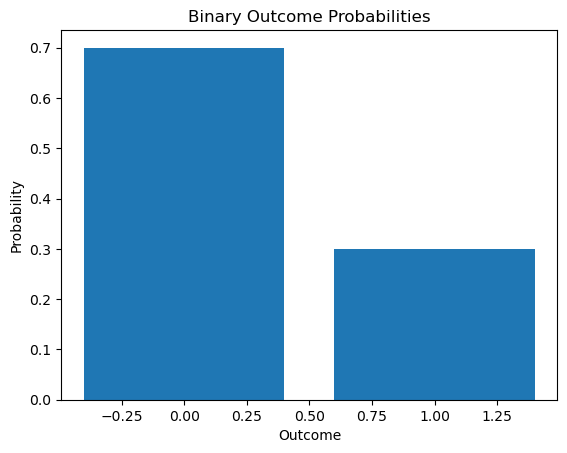

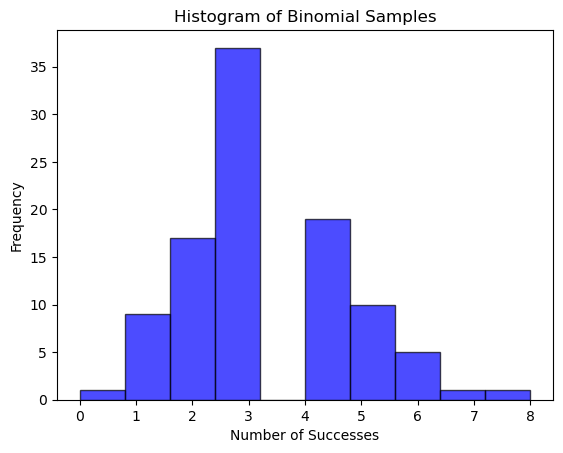

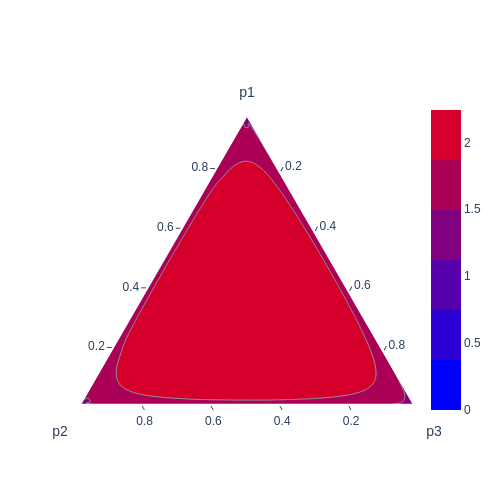

In [10]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import plotly.figure_factory as ff

bin_10_p3 = stats.binom(n=10, p=0.3)

plt.bar(height=[0.3, 0.7], x=[1, 0])
plt.title("Binary Outcome Probabilities")
plt.xlabel("Outcome")
plt.ylabel("Probability")
plt.show()

x = bin_10_p3.rvs(size=100)

plt.hist(x, bins=10, color='blue', alpha=0.7, edgecolor='black')
plt.title("Histogram of Binomial Samples")
plt.xlabel("Number of Successes")
plt.ylabel("Frequency")
plt.show()

p1 = np.linspace(0, 1, 100)
p2 = 1 - p1.copy()
p_ = np.linspace(0, 1, 100)
p1 = (p1[np.newaxis, :] * p_[:, np.newaxis]).flatten()
p2 = (p2[np.newaxis, :] * p_[:, np.newaxis]).flatten()
p3 = 1 - p1 - p2
valid_mask = (p3 >= 0) & (p3 <= 1)  # Valid points in the simplex
p1, p2, p3 = p1[valid_mask], p2[valid_mask], p3[valid_mask]
p = np.c_[p1, p2, p3]

alpha_prior = np.array([1.1, 1.1, 1.1])
dirichlet_prior = stats.dirichlet(alpha=alpha_prior)
dirichlet_prior_densities = dirichlet_prior.pdf(p.T)

fig = ff.create_ternary_contour(
    p.T,
    dirichlet_prior_densities,
    pole_labels=['p1', 'p2', 'p3'],
    interp_mode='cartesian',
    showscale=True
)

fig.show("png")
